#  <span style="color:firebrick">SHINY R PACKAGES</span>
<span style="color:orchid">**2024 Tidytuesday  Week 16** </span>

## Setup

### Libraries

In [12]:
import numpy as   np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_files


['/Library/Fonts/Roboto-Italic.ttf',
 '/Library/Fonts/Boska-Italic.otf',
 '/Library/Fonts/JuliaMono-BoldItalic.ttf',
 '/Library/Fonts/Pally-Regular.otf',
 '/Library/Fonts/JuliaMono-MediumItalic.ttf',
 '/Library/Fonts/Pally-Bold.otf',
 '/Library/Fonts/Kalam-Regular.ttf',
 '/Library/Fonts/FiraCode-Light.ttf',
 '/Library/Fonts/Pacifico-Regular.ttf',
 '/Library/Fonts/Tabular-Regular.otf',
 '/Library/Fonts/Aclonica-Regular.ttf',
 '/Library/Fonts/Festive-Regular.ttf',
 '/Library/Fonts/InputMonoCondensed-Regular.ttf',
 '/Library/Fonts/Boska-Light.otf',
 '/Library/Fonts/RobotoCondensed-Italic.ttf',
 '/Library/Fonts/JuliaMono-Light.ttf',
 '/Library/Fonts/Jersey10-Regular.ttf',
 '/Library/Fonts/JuliaMono-RegularItalic.ttf',
 '/Library/Fonts/InputMonoCondensed-Bold.ttf',
 '/Library/Fonts/Roboto-BoldItalic.ttf',
 '/Library/Fonts/Roboto-MediumItalic.ttf',
 '/Library/Fonts/FiraCode-Bold.ttf',
 '/Library/Fonts/GrenzeGotisch-ExtraBold.ttf',
 '/Library/Fonts/JuliaMono-LightItalic.ttf',
 '/Library/Fonts

In [24]:
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#rcParams['font.family'] = "sans-serif"
#rcParams['font.family'] = "Helvetica"
#rcParams['font.sans-serif'] = "Comic Sans MS"

rcParams['font.family'] = 'Jersey 10'
rcParams['font.family'] = 'Press Start 2P'
rcParams['font.family'] = 'Roboto'


#rcParams['font.size'] = '12'

### Data

In [3]:
data_url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-16/package_details.csv"
dd =  pd.read_csv(data_url)

/var/folders/9w/v257qsg5293f6s1lh74pbb6m0000gn/T/ipykernel_1099/97187436.py:2: DtypeWarning: Columns (10,26,27,28,42,53,56) have mixed types. Specify dtype option on import or set low_memory=False.
  dd =  pd.read_csv(data_url)


## Data Wrangling

### Overview

In [5]:
dd.head(2)

,Package,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,...,UseLTO,VignetteBuilder,ZipData,X-CRAN-Comment,Published,Reverse depends,Reverse imports,Reverse linking to,Reverse suggests,Reverse enhances
0,A3,1.0.0,NaN,"R (>= 2.15.0), xtable, pbapply",NaN,NaN,"randomForest, e1071",NaN,GPL (>= 2),NaN,...,NaN,NaN,NaN,NaN,2015-08-16,NaN,NaN,NaN,NaN,NaN
1,AalenJohansen,1.0,NaN,NaN,NaN,NaN,"knitr, rmarkdown",NaN,GPL (>= 2),NaN,...,NaN,knitr,NaN,NaN,2023-03-01,NaN,NaN,NaN,NaN,NaN


In [7]:
dd.columns

Index(['Package', 'Version', 'Priority', 'Depends', 'Imports', 'LinkingTo',
       'Suggests', 'Enhances', 'License', 'License_is_FOSS',
       'License_restricts_use', 'OS_type', 'Archs', 'MD5sum',
       'NeedsCompilation', 'Additional_repositories', 'Author', 'Authors@R',
       'Biarch', 'BugReports', 'BuildKeepEmpty', 'BuildManual',
       'BuildResaveData', 'BuildVignettes', 'ByteCompile',
       'Classification/ACM', 'Classification/ACM-2012', 'Classification/JEL',
       'Classification/MSC', 'Classification/MSC-2010', 'Collate', 'Contact',
       'Copyright', 'Date', 'Date/Publication', 'Description', 'Encoding',
       'KeepSource', 'Language', 'LazyData', 'LazyDataCompression', 'LazyLoad',
       'MailingList', 'Maintainer', 'Note', 'Packaged', 'RdMacros',
       'StagedInstall', 'SysDataCompression', 'SystemRequirements', 'Title',
       'Type', 'URL', 'UseLTO', 'VignetteBuilder', 'ZipData', 'X-CRAN-Comment',
       'Published', 'Reverse depends', 'Reverse imports', 'Revers

### Cleaning Author column

In [8]:
authors_df = dd[['Package', 'Author']]
authors_df.head(6)

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,"Martin Bladt [aut, cre],\n Christian Furrer [..."
2,AATtools,"Sercan Kahveci [aut, cre]"
3,ABACUS,"Mintu Nath [aut, cre]"
4,abbreviate,"Sigbert Klinke [aut, cre]"
5,abc,"Csillery Katalin [aut],\n Lemaire Louisiane [..."


In [9]:
#authors_df['Author'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


In [10]:
#authors_df2 = authors_df.assign(Author = authors_df['Author'].str.replace(r'(\\[.+\\])', '', regex=True))
authors_df2 = authors_df.assign(Author = authors_df['Author'].str.replace('[aut, cre]', ''))

authors_df2['Author'] = authors_df2['Author'].str.replace('[aut]', '')
authors_df2['Author'] = authors_df2['Author'].str.replace('[aut, cph, cre]', '')

authors_df2.head(5)

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,"Martin Bladt ,\n Christian Furrer"
2,AATtools,Sercan Kahveci
3,ABACUS,Mintu Nath
4,abbreviate,Sigbert Klinke


In [ ]:
authors_df2

In [ ]:
dd['Author'].str.split(',' ,expand=True)

**Using Regex**

In [13]:
authors_df3 = authors_df.assign(Author = authors_df['Author'].map(lambda x: re.sub("[\(\[].*?[\)\]]", "", x)))
authors_df3['Author'] = authors_df3['Author'].str.replace(' and ', ' ')
authors_df3['Author'] = authors_df3['Author'].str.replace('author of ada-url :', '')
authors_df3['Author'] = authors_df3['Author'].str.replace('Original author of monoSpl.c .', '')
authors_df3['Author'] = authors_df3['Author'].str.replace(')', '')
authors_df3['Author'] = authors_df3['Author'].str.replace('(', '')
authors_df3['Author'] = authors_df3['Author'].str.replace(r'\<.*>', '', regex=True)
authors_df3

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,"Martin Bladt ,\n Christian Furrer"
2,AATtools,Sercan Kahveci
3,ABACUS,Mintu Nath
4,abbreviate,Sigbert Klinke
...,...,...
18469,zTree,Oliver Kirchkamp
18470,ztype,Vincent Guyader
18471,ZVCV,Leah F. South
18472,zyp,"David Bronaugh ,\n Arelia Schoeneberg ,\n Le..."


In [14]:
print(authors_df3.loc[152, 'Author'])

Jan Meis  ,
  Martin Maechler  ,
    


### Separating Author column

In [15]:
#authors_df3['Author'].str.split(',', expand=False)
#authors_df4 = authors_df3.explode('Author')
authors_df4 = authors_df3.set_index('Package')
authors_df4 = authors_df4.apply(lambda x: x.str.split(',').explode()).reset_index()
authors_df4.head()

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,Martin Bladt
2,AalenJohansen,\n Christian Furrer
3,AATtools,Sercan Kahveci
4,ABACUS,Mintu Nath


### Remove blank spaces

In [16]:
authors_df4['Author'] = authors_df4['Author'].apply(lambda x: x.strip())
authors_df4

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,Martin Bladt
2,AalenJohansen,Christian Furrer
3,AATtools,Sercan Kahveci
4,ABACUS,Mintu Nath
...,...,...
52961,ZVCV,Leah F. South
52962,zyp,David Bronaugh
52963,zyp,Arelia Schoeneberg
52964,zyp,Lee Zeman


### Counting Authors: 

- Remove organisation listed as author:
- Count the number of package where indivividual is listed as  author
- Select top 20 authors

In [17]:
org_corp = ['PBC', 'Posit Software', 'RStudio', 'Inc.', 'Windsor.ai',  'F. Hoffmann-La Roche AG', 'Posit', 'R Core Team', 'Robin K. S. Hankin']
authors_df5 = authors_df4[~authors_df4.Author.isin(org_corp)]
authors_df5

,Package,Author
0,A3,Scott Fortmann-Roe
1,AalenJohansen,Martin Bladt
2,AalenJohansen,Christian Furrer
3,AATtools,Sercan Kahveci
4,ABACUS,Mintu Nath
...,...,...
52961,ZVCV,Leah F. South
52962,zyp,David Bronaugh
52963,zyp,Arelia Schoeneberg
52964,zyp,Lee Zeman


In [29]:
df = authors_df5.value_counts('Author').reset_index()
dff = df[df.Author != ""].head(20)
dff

,Author,count
0,Hadley Wickham,157
2,Jeroen Ooms,85
3,Scott Chamberlain,73
4,Stéphane Laurent,73
5,Dirk Eddelbuettel,66
6,Gábor Csárdi,66
7,Achim Zeileis,58
8,Kurt Hornik,56
9,Kirill Müller,56
10,Martin Maechler,52


## Viz

In [20]:
rcParams['font.family'] = 'Roboto'


### Pandas bar plot

<Axes: title={'center': 'R PACKAGES AUTHORS\nTop 20 authors as of April 2024'}>

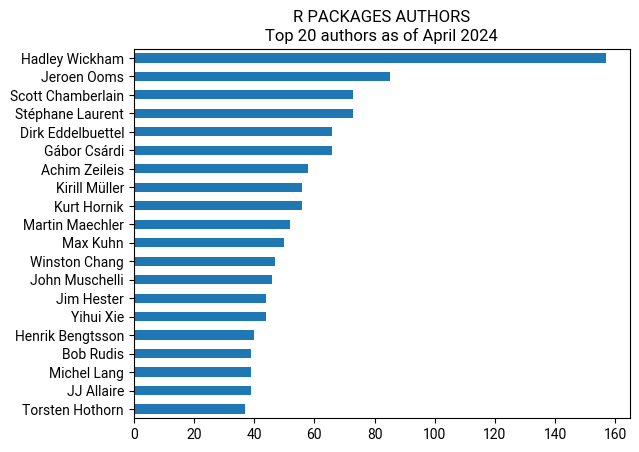

In [25]:
dff1 = dff[['Author', 'count']]

dff1.set_index('Author').sort_values('count').plot(
    kind='barh',
    title = 'R PACKAGES AUTHORS\nTop 20 authors as of April 2024',
    ylabel='',
    legend=False
    )

In [35]:
dff['row'] = np.linspace(0,19,20).astype('int')
dff.head(2)

,Author,count,row
0,Hadley Wickham,157,0
2,Jeroen Ooms,85,1


### Seaborn bar plot

In [36]:
dff.head()

,Author,count,row
0,Hadley Wickham,157,0
2,Jeroen Ooms,85,1
3,Scott Chamberlain,73,2
4,Stéphane Laurent,73,3
5,Dirk Eddelbuettel,66,4


In [37]:
rcParams['font.family'] = 'Roboto'

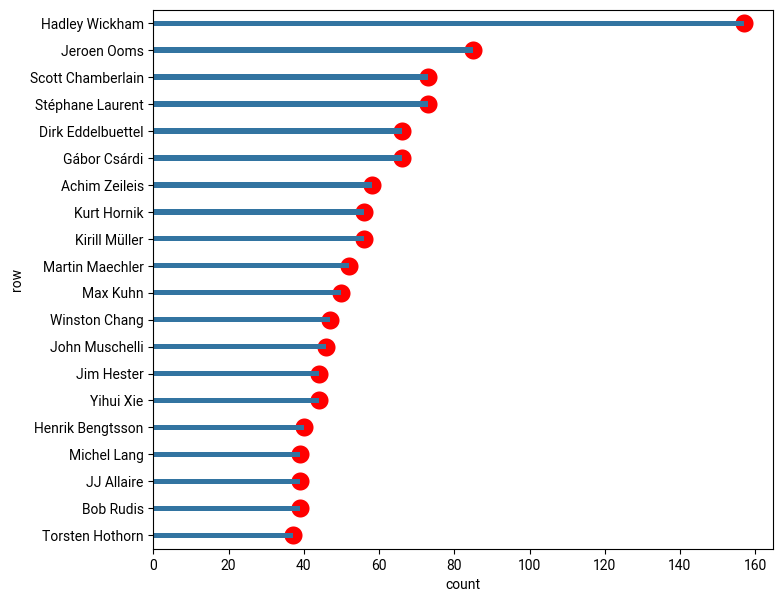

In [39]:
fig, ax = plt.subplots(figsize=(8, 7))

ax = sns.scatterplot(
    x = 'count', y = 'row', data = dff,
    s=200, color="red")
ax = sns.barplot(
    x = 'count', y = 'Author', data = dff,
    width = 0.2)

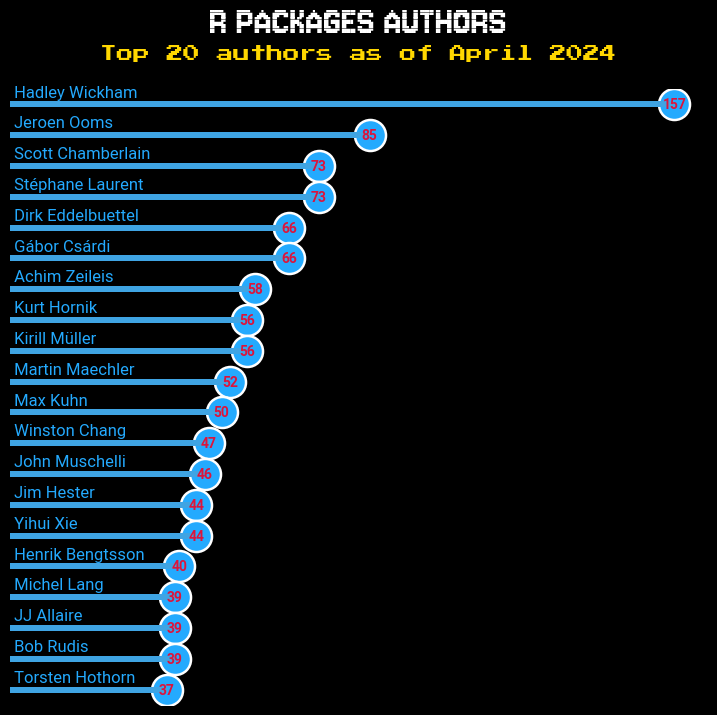

In [47]:
fig, ax = plt.subplots(figsize=(9, 8), facecolor='black')
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

ax = sns.scatterplot(
    x = 'count', y = 'row', data = dff,
    s=500, color="#24aafe")
ax = sns.barplot(
    x = 'count', y = 'Author', data = dff,
    color = '#24aafe',
    width = 0.2
    )

ax.set(frame_on=False)
ax.set_xlabel('')
ax.set_ylabel('')
#ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelbottom = False, labelleft = False)

for p in ax.patches:
    width = p.get_width() 
    ax.text(width,       
            p.get_y() + .1, 
            '{:1.0f}'.format(width),
            ha = 'center',   va = 'center',  color= 'crimson', weight='bold', 
            )  
    
for i, (val, name) in enumerate(zip(dff['count'], dff['Author'])):
    ax.text(x=0, y=i - .4, s=f' {name}',
            ha='left', va='center', fontsize=12, color= '#24aafe')
    
fig.suptitle("R PACKAGES AUTHORS", size=30, x=mid, color = 'white', weight='bold', family = 'Jersey 10')
ax.set_title(
    'Top 20 authors as of April 2024',
    size=12, x=.5, color = 'gold', weight='bold', pad=20, family  = 'Press Start 2P')

plt.show()